# 1. Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6),dpi=144)  #設置畫布大小和辨識率


<Figure size 1152x864 with 0 Axes>

In [2]:
data = pd.read_csv("titanic_train.csv")

- 檢視資料

In [3]:
# data.head(10)
#data.tail(10)
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24,1,1.0,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
12,13,0,3.0,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
749,750,0,3.0,"Connaghton, Mr. Michael",male,31.0,0,0,335097,7.7500,NaN,Q
327,328,1,2.0,"Ball, Mrs. (Ada E Hall)",female,36.0,0,0,28551,13.0000,D,S
663,664,0,3.0,"Coleff, Mr. Peju",male,36.0,0,0,349210,7.4958,NaN,S
688,689,0,3.0,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S
597,598,0,3.0,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
64,65,0,1.0,"Stewart, Mr. Albert A",male,NaN,0,0,PC 17605,27.7208,NaN,C
658,659,0,2.0,"Eitemiller, Mr. George Floyd",male,23.0,0,0,29751,13.0000,NaN,S
567,568,0,3.0,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         853 non-null float64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 83.6+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,853.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.304807,30.154300,0.545455,0.381594,32.204208
std,257.353842,0.486592,0.835502,16.591337,1.281199,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.750000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,200.000000,20.000000,6.000000,512.329200


In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass         float64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass          38
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2. EDA

# 3. Preprocess

- 補 NA
- Encoding

In [8]:
df = data.copy()

In [9]:
df['Age'].fillna(df.Age.mean(), inplace = True)

In [10]:
df['Pclass'].fillna(df.Pclass.mode()[0], inplace = True)

In [11]:
df['Embarked'].fillna(df.Embarked.mode()[0], inplace = True)

In [12]:
df = df.drop(columns={"Name","Ticket","Cabin"})

In [13]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3.0,male,22.0,1,0,7.2500,S
1,2,1,1.0,female,38.0,1,0,71.2833,C
2,3,1,3.0,female,26.0,0,0,7.9250,S
3,4,1,1.0,female,35.0,1,0,53.1000,S
4,5,0,3.0,male,35.0,0,0,8.0500,S


#### encoding
- label encoding
- one hot encoding

In [14]:
df.Sex = df.Sex.map({"female":0, "male":1}).astype(int)

In [15]:
df.Embarked = df.Embarked.map({"C":0, "S":1, "Q":2}).astype(int)

In [16]:
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
178,179,0,2.0,1,30.0,0,0,13.0000,1
321,322,0,3.0,1,27.0,0,0,7.8958,1
268,269,1,1.0,0,58.0,0,1,153.4625,1
754,755,1,2.0,0,48.0,1,2,65.0000,1
14,15,0,3.0,0,14.0,0,0,7.8542,1


In [17]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# 4. Model

### 4-1. 切資料集

In [18]:
from sklearn.model_selection import train_test_split
train_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
X_train, X_test, y_train, y_test = train_test_split(df[train_cols], df['Survived'], test_size=0.3, random_state=400)

### 4-2. 選擇模型

In [19]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


### 4-3. fit model

In [20]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

### 4-4. 評估模型

In [21]:
from sklearn import metrics
print("accuracy:%.2f"% metrics.accuracy_score(y_test, pred))

accuracy:0.84


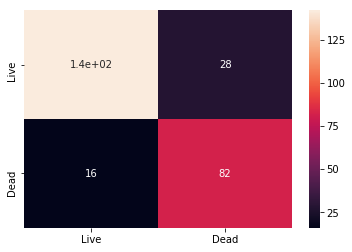

In [22]:
confusion_matrix = metrics.confusion_matrix(y_true= y_test, y_pred=pred)
cm =pd.DataFrame(confusion_matrix , index = ['Live', 'Dead'], columns = [ 'Live', 'Dead'])
sns.heatmap(cm, annot = True)  

# 5. Cross Validation

In [23]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
scores = cross_val_score(clf, df[train_cols], df['Survived'], cv=3)
np.mean(scores)

0.7878787878787877